Привет, меня зовут Артем. Сегодня я проверю твой проект.
<br> Дальнейшее общение будет происходить на "ты" если это не вызывает никаких проблем.
<br> Желательно реагировать на каждый мой комментарий ('исправил', 'не понятно как исправить ошибку', ...)
<br> Пожалуйста, не удаляй комментарии ревьюера, так как они повышают качество повторного ревью.

Комментарии будут в <font color='green'>зеленой</font>, <font color='blue'>синей</font> или <font color='red'>красной</font> рамках:

<div class="alert alert-block alert-success">
<b>Успех:</b> Если все сделано отлично
</div>

<div class="alert alert-block alert-info">
<b>Совет: </b> Если можно немного улучшить
</div>

<div class="alert alert-block alert-danger">
<b>Ошибка:</b> Если требуются исправления. Работа не может быть принята с красными комментариями.
</div>

-------------------

Будет очень хорошо, если ты будешь помечать свои действия следующим образом:
<div class="alert alert-block alert-warning">
<b>Комментарий студента:</b> ...
</div>

<div class="alert alert-block alert-warning">
<b>Изменения:</b> Были внесены следующие изменения ...
</div>

#### <font color='orange'>Полезные ссылки:</font>
* Могу предложить обратить внимание на вот этот курс: https://vk.com/dlschool_mipt

### <font color='orange'>Общее впечатление</font>
* Большое спасибо за проделанную работу. Видно, что приложено много усилий.
* Выводы и рассуждения получились содержательными, их было интересно читать.
* Радует, что проект хорошо структурирован. Приятно проверять такие работы.
* Я оставил несколько советов. Пожалуйста, обрати на них внимание.
* Тебе удалось успешно справиться с первой задачей в области компьютерного зрения. Поздравляю!
* Проект может быть зачтен, но я его отправлю назад, чтобы у тебя была возможность задать вопросы и внести правки, при желании. Однако, ты можешь просто вернуть проект в таком же виде и я его зачту.

### <font color='orange'>Общее впечатление (ревью 2)</font>
* Проект зачтен!
* Удачи в дальнейшем обучении и следующих работах!

# Определение возраста покупателей

**Основной целью проекта** создать решение на базе нейронной сети, позволяющее определять возраст человека по его фотографии (задача регрессии). Предоставленные данные: `labels.csv` (название файла - возраст) и фотографии людей в виде файлов.

## Исследовательский анализ данных

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator 

In [2]:
%%time
# загрузка данных
labels = pd.read_csv('/datasets/faces/labels.csv') # метки возраста
train_datagen = ImageDataGenerator(rescale=1./255) # для чтения файловых изображений 

train_gen_flow = train_datagen.flow_from_dataframe(
        dataframe=labels,
        directory='/datasets/faces/final_files/',
        x_col='file_name',
        y_col='real_age',
        target_size=(224, 224),
        batch_size=32,
        class_mode='raw',
        seed=12345)

Found 7591 validated image filenames.
CPU times: user 572 ms, sys: 430 ms, total: 1 s
Wall time: 1min 24s


In [3]:
labels.head()

,file_name,real_age
0,000000.jpg,4
1,000001.jpg,18
2,000002.jpg,80
3,000003.jpg,50
4,000004.jpg,17


In [4]:
labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7591 entries, 0 to 7590
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   file_name  7591 non-null   object
 1   real_age   7591 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 118.7+ KB


<div class="alert alert-block alert-success">
<b>Успех:</b> Данные загружены корректно. Хорошо, что ты не забываешь про первичный осмотр загруженного файла!
</div>

Размер выборки достаточно велик: всего найдено 7591 изображение.

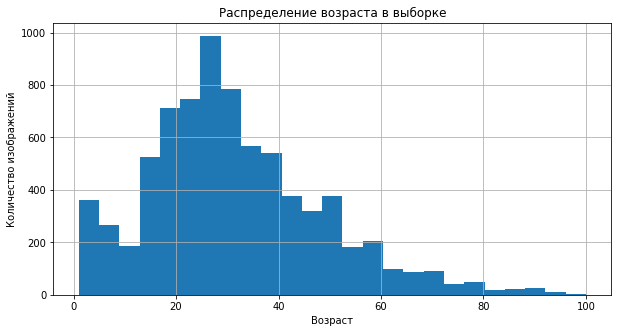

In [7]:
labels['real_age'].hist(figsize=(10, 5), bins=25)
plt.title('Распределение возраста в выборке')
plt.xlabel('Возраст')
plt.ylabel('Количество изображений')
plt.show()

<div class="alert alert-block alert-info">
<b>Совет: </b> Я бы увеличил количество столбиков.
</div>

<div class="alert alert-block alert-warning">
<b>Комментарий студента:</b> Чуть-чуть изменилась картинка. Много фотографий детей чуть старше года.
</div>

In [6]:
labels['real_age'].describe()

count    7591.000000
mean       31.201159
std        17.145060
min         1.000000
25%        20.000000
50%        29.000000
75%        41.000000
max       100.000000
Name: real_age, dtype: float64

В датасет попали изображения людей в возрасте до 100 лет, в том числе и дети от 1 года и выше. Распределение целевой переменной (возраста) схоже с нормальным, однако, скошено влево, что говорит о бОльшем присутствии в датасете изображений именно молодых людей. Это может повлиять на последующую предсказательную способность модели: хуже всего ей будут определяться люди из более редких возрастных групп.

Выведем первые 15 изображений.

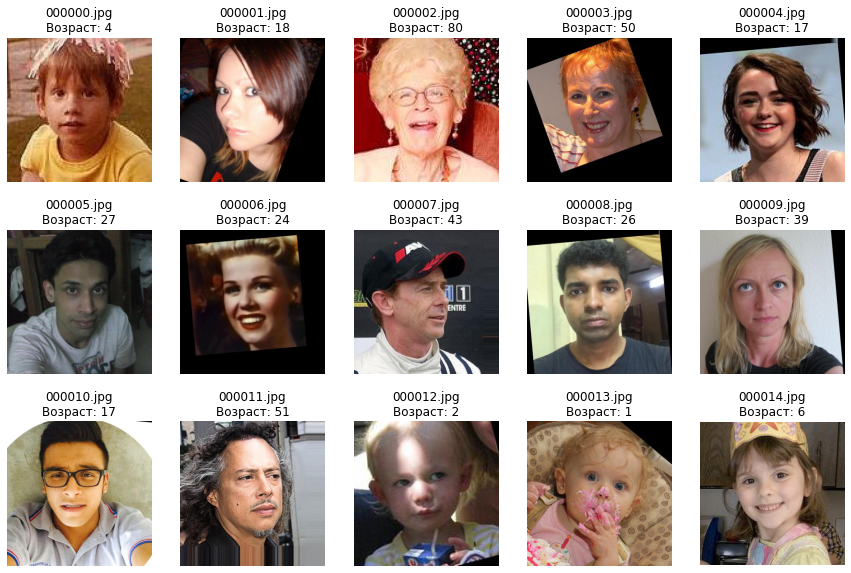

In [7]:
fig = plt.figure(figsize=(15, 10))

# вывод изображений
for i, row in labels.loc[:14].iterrows():
    file_name = row['file_name']
    age = row['real_age']
    
    image = plt.imread(f'/datasets/faces/final_files/{file_name}')
    ax = fig.add_subplot(3, 5, i+1)
    ax.set_title(f'{file_name}\nВозраст: {age}')
    plt.imshow(image)
    plt.axis('off')
    
plt.show()

Фотографии сделаны при различных условиях и освещении, некоторые из них обрезаны или повернуты. Однако, лицо человека видно хорошо. Также наблюдается разнообращие по полу, расе и времени создания фотографии, что будет полезно для обучения модели.

<div class="alert alert-block alert-success">
<b>Успех:</b> Хорошо, что в названиях изображений указан возраст.
</div>

## Обучение модели

Нейросетевое решение будет создано на основе предобученной модели ResNet50. \
**Метрика качества**: MAE \
**Функция потерь**: MSE (позволит нейросети обучаться быстрее)

Код, успешно запущенный в GPU-тренажере:

```python

import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications.resnet import ResNet50


# загрузка тренировочной выборки
def load_train(path):
    labels = pd.read_csv(path + 'labels.csv')
    datagen = ImageDataGenerator(validation_split=0.25, rescale=1./255)

    train_gen_flow = datagen.flow_from_dataframe(
        dataframe=labels,
        directory=path + '/final_files',
        x_col='file_name',
        y_col='real_age',
        target_size=(224, 224),
        batch_size=32,
        class_mode='raw',
        subset='training',
        seed=12345)

    return train_gen_flow


# загрузка тестовой выборки
def load_test(path):
    labels = pd.read_csv(path + 'labels.csv')
    datagen = ImageDataGenerator(validation_split=0.25, rescale=1./255)

    test_gen_flow = datagen.flow_from_dataframe(
        dataframe=labels,
        directory=path + '/final_files',
        x_col='file_name',
        y_col='real_age',
        target_size=(224, 224),
        batch_size=32,
        class_mode='raw',
        subset='validation',
        seed=12345)

    return test_gen_flow


# формирование модели
def create_model(input_shape):
    backbone = ResNet50(input_shape=input_shape,
                    weights='imagenet',
                    include_top=False)

    model = Sequential()
    model.add(backbone)
    model.add(GlobalAveragePooling2D())
    model.add(Dense(1, activation='relu'))

    optimizer = Adam(lr=0.00001)
    model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mae'])

    return model


# обучение модели
def train_model(model, train_data, test_data, batch_size=None, epochs=10, steps_per_epoch=None, validation_steps=None):
    model.fit(train_data,
              validation_data=test_data,
              batch_size=batch_size, epochs=epochs,
              steps_per_epoch=steps_per_epoch,
              validation_steps=validation_steps,
              verbose=2)
    
    return model

```

Вывод из консоли:
```

2023-09-17 08:51:19.501647: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libnvinfer.so.6
2023-09-17 08:51:19.503251: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libnvinfer_plugin.so.6
2023-09-17 08:51:20.333662: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2023-09-17 08:51:20.342388: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1555] Found device 0 with properties:
pciBusID: 0000:8b:00.0 name: Tesla V100-SXM2-32GB computeCapability: 7.0
coreClock: 1.53GHz coreCount: 80 deviceMemorySize: 31.75GiB deviceMemoryBandwidth: 836.37GiB/s
2023-09-17 08:51:20.342450: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
2023-09-17 08:51:20.342482: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcublas.so.10
2023-09-17 08:51:20.344392: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcufft.so.10
2023-09-17 08:51:20.344787: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcurand.so.10
2023-09-17 08:51:20.346719: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcusolver.so.10
2023-09-17 08:51:20.347866: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcusparse.so.10
2023-09-17 08:51:20.347929: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudnn.so.7
2023-09-17 08:51:20.350620: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1697] Adding visible gpu devices: 0
Using TensorFlow backend.
Found 5694 validated image filenames.
Found 1897 validated image filenames.
2023-09-17 08:51:20.535269: I tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 AVX512F FMA
2023-09-17 08:51:20.541449: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2099995000 Hz
2023-09-17 08:51:20.541993: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x5007460 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2023-09-17 08:51:20.542020: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Host, Default Version
2023-09-17 08:51:20.685754: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x4667fe0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-09-17 08:51:20.685791: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Tesla V100-SXM2-32GB, Compute Capability 7.0
2023-09-17 08:51:20.687314: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1555] Found device 0 with properties:
pciBusID: 0000:8b:00.0 name: Tesla V100-SXM2-32GB computeCapability: 7.0
coreClock: 1.53GHz coreCount: 80 deviceMemorySize: 31.75GiB deviceMemoryBandwidth: 836.37GiB/s
2023-09-17 08:51:20.687366: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
2023-09-17 08:51:20.687376: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcublas.so.10
2023-09-17 08:51:20.687396: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcufft.so.10
2023-09-17 08:51:20.687405: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcurand.so.10
2023-09-17 08:51:20.687414: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcusolver.so.10
2023-09-17 08:51:20.687422: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcusparse.so.10
2023-09-17 08:51:20.687429: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudnn.so.7
2023-09-17 08:51:20.690386: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1697] Adding visible gpu devices: 0
2023-09-17 08:51:20.690436: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
2023-09-17 08:51:21.033211: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1096] Device interconnect StreamExecutor with strength 1 edge matrix:
2023-09-17 08:51:21.033263: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1102]      0
2023-09-17 08:51:21.033271: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1115] 0:   N
2023-09-17 08:51:21.036002: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:39] Overriding allow_growth setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
2023-09-17 08:51:21.036049: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1241] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 10240 MB memory) -> physical GPU (device: 0, name: Tesla V100-SXM2-32GB, pci bus id: 0000:8b:00.0, compute capability: 7.0)
Downloading data from https://github.com/keras-team/keras-applications/releases/download/resnet/resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5
<class 'tensorflow.python.keras.engine.sequential.Sequential'>

Train for 178 steps, validate for 60 steps
Epoch 1/10
2023-09-17 08:51:33.741176: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcublas.so.10
2023-09-17 08:51:34.097562: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudnn.so.7
178/178 - 49s - loss: 792.8715 - mae: 23.4460 - val_loss: 1158.1762 - val_mae: 29.6161
Epoch 2/10
178/178 - 39s - loss: 198.1042 - mae: 10.6301 - val_loss: 1157.2175 - val_mae: 29.6004
Epoch 3/10
178/178 - 40s - loss: 83.5713 - mae: 6.7679 - val_loss: 910.8204 - val_mae: 25.4982
Epoch 4/10
178/178 - 39s - loss: 41.9483 - mae: 4.8670 - val_loss: 215.4585 - val_mae: 10.9621
Epoch 5/10
178/178 - 39s - loss: 23.8367 - mae: 3.7120 - val_loss: 111.7457 - val_mae: 8.0161
Epoch 6/10
178/178 - 39s - loss: 16.0842 - mae: 3.1100 - val_loss: 96.7666 - val_mae: 7.4672
Epoch 7/10
178/178 - 39s - loss: 13.5588 - mae: 2.8391 - val_loss: 93.8218 - val_mae: 7.3197
Epoch 8/10
178/178 - 40s - loss: 12.9963 - mae: 2.7474 - val_loss: 92.6374 - val_mae: 7.2893
Epoch 9/10
178/178 - 39s - loss: 12.1088 - mae: 2.6694 - val_loss: 92.1297 - val_mae: 7.2096
Epoch 10/10
178/178 - 40s - loss: 11.1589 - mae: 2.5796 - val_loss: 91.3527 - val_mae: 7.1981
WARNING:tensorflow:sample_weight modes were coerced from
  ...
    to
  ['...']
60/60 - 10s - loss: 91.3527 - mae: 7.1981
Test MAE: 7.1981

```

<div class="alert alert-block alert-success">
<b>Успех:</b> Модель определена верно.
</div>

<div class="alert alert-block alert-info">
<b>Совет: </b> Желательно было добавить горизонтальный флип на тренировочной части. По сути это позволило бы увеличить выборку в 2 раза. Причем изображения полученные таким образом были бы неотличимы от настоящих.
</div>

<div class="alert alert-block alert-warning">
<b>Комментарий студента:</b> Учту на будущее!
</div>

## Анализ обученной модели и выводы

Модель на базе ResNet50 (нейросеть, предобученная на выборке imagenet) показала достаточно хорошие результаты как по качеству предсказания, так и по времени обучения.

**Время обучения одной эпохи на GPU**: 30 сек.

**Финальное значение MAE На тестовой выборке**: 7.1981, т.е. модель способна предсказать возраст человека с отклонением в 7 лет. При этом, наилучшее качество она будет показывать для молодых людей (30 +- 10 лет), фотографии которых более обширно были представлены в датасете. 

Для анализа покупок и формирования специализированных предложений для той или иной возрастной группы полученная точность модели будет достаточной. А вот для контроля добросовестности кассиров не совсем. Модель хорошо определит совсем маленьких детей, но ей будет сложно сказать, достиг ли совершеннолетия подросток лет 15-17, чтобы покупать алкоголь.


<div class="alert alert-block alert-info">
<b>Совет: </b> Можно было еще сказать несколько слов о бизнесе. Позволяет ли полученная модель решить поставленные бизнесом задачи?
</div>

<div class="alert alert-block alert-warning">
<b>Комментарий студента:</b> Чуть-чуть расширила вывод. Большое спасибо за ревью и полезные советы!
</div>

## Чек-лист

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Исследовательский анализ данных выполнен
- [x]  Результаты исследовательского анализа данных перенесены в финальную тетрадь
- [x]  MAE модели не больше 8
- [x]  Код обучения модели скопирован в финальную тетрадь
- [x]  Результат вывода модели на экран перенесён в финальную тетрадь
- [x]  По итогам обучения модели сделаны выводы